## Import

In [2]:
import numpy as np
import pickle as pkl
from matplotlib import pyplot as plt

In [31]:
seed_list = [0,42,123]#,20260116]
fold_list = [0,1,2,3,4]
outputs = {}
for seed in seed_list:
    for fold in fold_list:
        folder_path = f"output_models/full_lc/seed#{seed}/{fold}-fold"
        outputs[f"seed#{seed}_{fold}-fold"] = pkl.load(open(folder_path + "/model_evals.pkl".format(seed),"rb"))

#### Plot train loss (blue) and validation loss (red) for different seeds (5 in each seed for each loss)

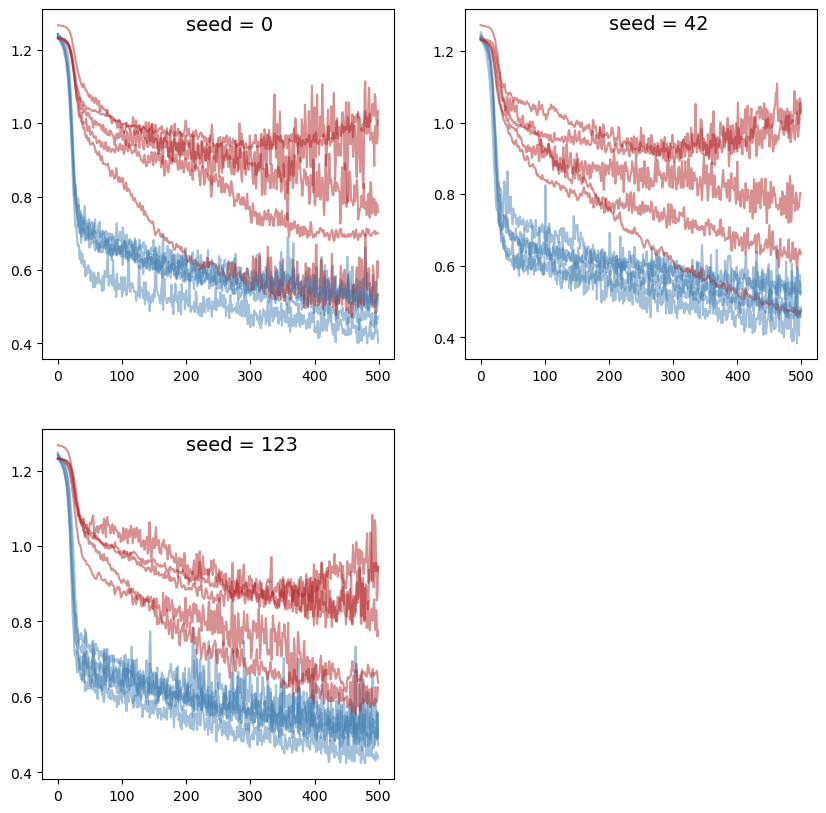

In [32]:
fig = plt.figure(figsize=(10,10))
for ix1, seed in enumerate(seed_list):
    ax = fig.add_subplot(2,2,ix1+1)
    for ix2, fold in enumerate(fold_list):
        output = outputs[f"seed#{seed}_{fold}-fold"]
        ax.plot(output["train_loss"], color='steelblue', alpha=0.5)
        ax.plot(output["val_loss"], color='firebrick', alpha=0.5)
        if ix2 == 0:
            ax.text(s='seed = {}'.format(seed),x=len(output["val_loss"])/2.5,y=max(max(output["train_loss"]),max(output["val_loss"]))/1.01,fontsize=14)

#### Plot TPR (blue) and TNR (red) for different seeds (5 in each seed for each loss)

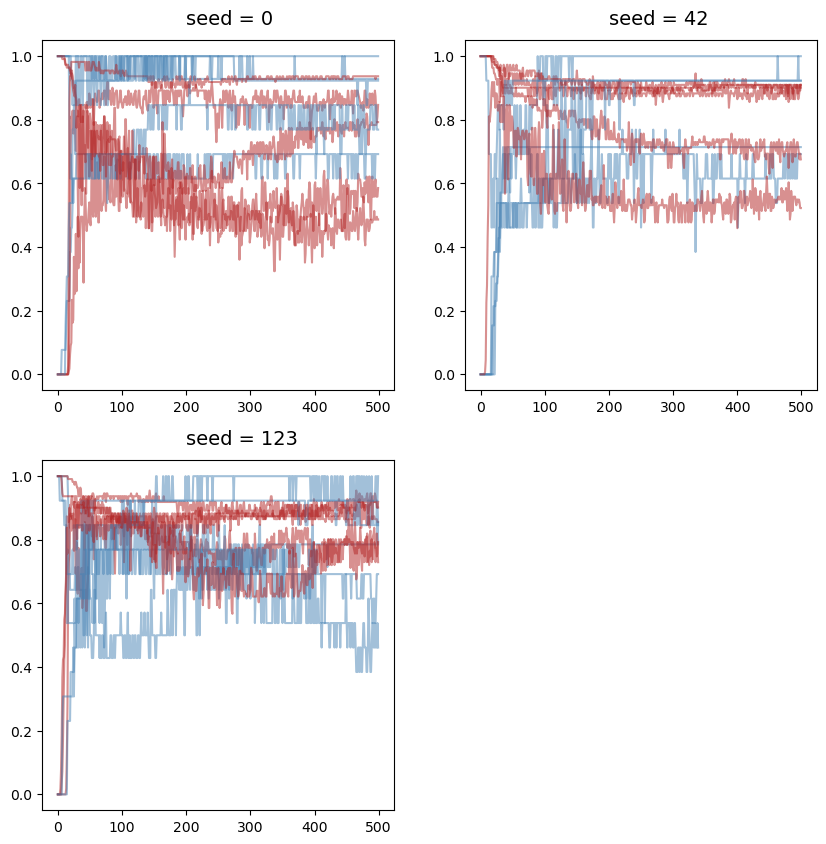

In [ ]:
fig = plt.figure(figsize=(10,10))
for ix1, seed in enumerate(seed_list):
    ax = fig.add_subplot(2,2,ix1+1)
    for ix2, fold in enumerate(fold_list):
        output = outputs[f"seed#{seed}_{fold}-fold"]
        tn = output['tn']
        fp = output['fp']
        fn = output['fn']
        tp = output['tp']

        tpr = tp/(tp+fn)
        tnr = tn/(fp+tn)
    
        ax.plot(tpr, color='steelblue', alpha=0.5)
        ax.plot(tnr, color='firebrick', alpha=0.5)
        if ix2 == 0:
            ax.text(s='seed = {}'.format(seed),x=len(output["val_loss"])/2.5,y=1.1,fontsize=14)

#### Plot confusing matrix for the best fold of each seed

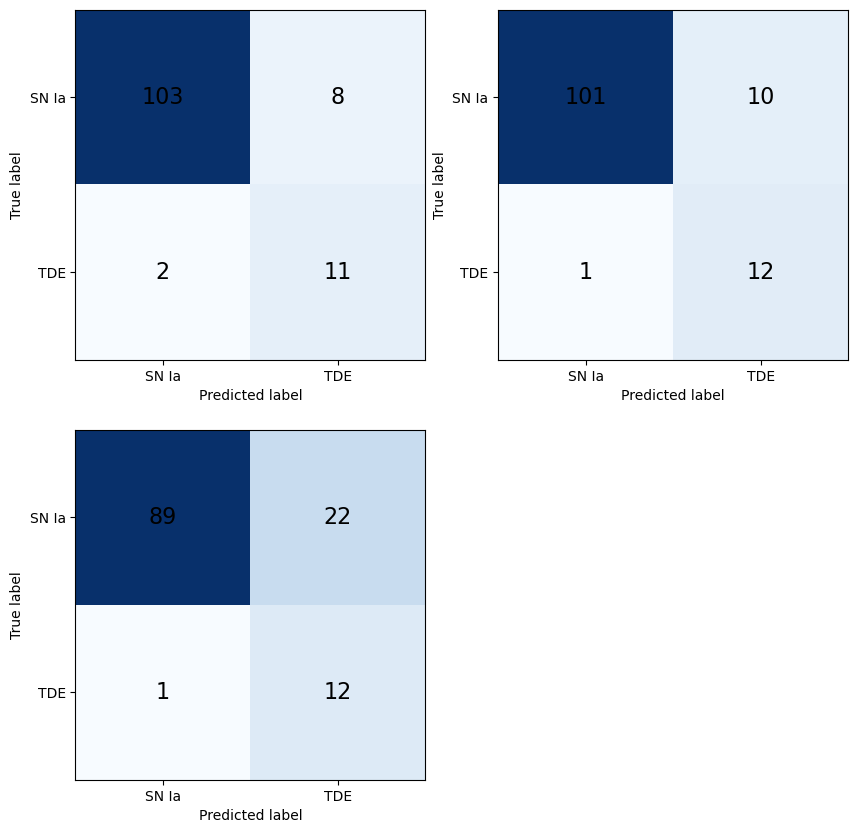

In [52]:
fig = plt.figure(figsize=(10,10))
for ix1, seed in enumerate(seed_list):
    ax = fig.add_subplot(2,2,ix1+1)
    best_val_loss = np.inf
    worst_val_loss = 0.
    for ix2, fold in enumerate(fold_list):
        output = outputs[f"seed#{seed}_{fold}-fold"]
        best_val_loss_ix = output['val_loss'].argmin()
        temp_best_val_loss = output['val_loss'][val_loss_ix]
        temp_worst_val_loss = output['val_loss'][val_loss_ix]
        if temp_best_val_loss < best_val_loss:
            best_val_loss = temp_best_val_loss
            ix_best_to_plot = ix2
        if temp_worst_val_loss > best_val_loss:
            worst_val_loss = temp_worst_val_loss
            ix_worst_to_plot = ix2
    for ix2, fold in enumerate(fold_list):
        if ix2 == ix_best_to_plot:
            output = outputs[f"seed#{seed}_{fold}-fold"]
            val_loss_ix = output['val_loss'].argmin()
            cm = np.array([
                [output['tn'][val_loss_ix], output['fp'][val_loss_ix]],   # [TN, FP]
                [output['fn'][val_loss_ix],  output['tp'][val_loss_ix]]    # [FN, TP]
            ])
            labels = ["SN Ia", "TDE"]
            im = ax.imshow(cm, cmap="Blues")
            
            # Show values on the cells
            for (i, j), val in np.ndenumerate(cm):
                ax.text(j, i, f"{val}", ha="center", va="center", color="black",fontsize=16)
            
            # Axis labels
            ax.set_xticks([0, 1], labels)
            ax.set_yticks([0, 1], labels)
        
            ax.set_xlabel("Predicted label")
            ax.set_ylabel("True label")